# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 2</span>


### Esercizio 2.1

Lo scopo di questo esercizio è calcolare l'integrale $I = \int_0^1\frac{\pi}{2}\cos(\pi x/2) dx = 1$ col metodo di Monte Carlo utilizzando sia un *samping uniforme* sia *l'importance sampling*

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

**(1) Sampling con distribuzione uniforme in [0,1]**

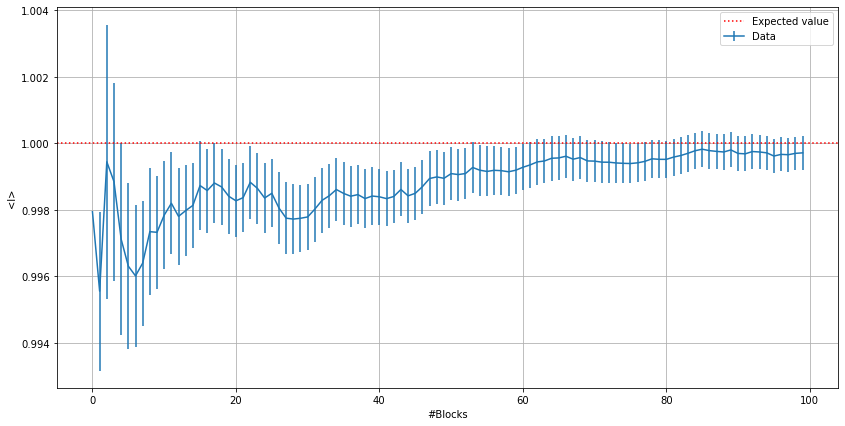

In [3]:
N = 100 # Number of blocks
prog_average = np.loadtxt("../results/EX02_1(1).dat", usecols=0)
prog_error = np.loadtxt("../results/EX02_1(1).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average, yerr=prog_error, label = "Data")
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.show()

**(2) Importance sampling**

Per l'importance sampling occorre scegliere una funzione densità di probabilità (pdf) simile alla mia integranda $f(x)$ nell'intervallo $[0,1]$ che mi permette di ottenere l'integrale $I$ tramite:
$$I = \int_0^1 \frac{f(x)}{w(x)}w(x) dx = <\frac{f(x)}{w(x)}>_{w(x)}$$

Scegliendo $w(x)=2(1-x)$ vediamo che le due si somigliano nell'intervallo d'interesse:

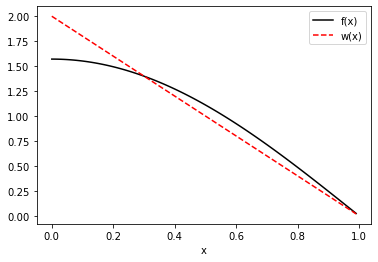

In [6]:
t2 = np.arange(0.0, 1.0, 0.01)

plt.plot(t2, (np.pi/2)*np.cos(np.pi/2*t2), 'k', label='f(x)')
plt.plot(t2, 2*(1-t2), 'r--', label='w(x)')
plt.legend(loc="upper right")
plt.xlabel('x')

plt.show()

In questo modo si ottiene: $$I\approx \frac{1}{N}\sum^N_{i=0} \frac{f(x_i)}{w(x_i)}=\frac{1}{N}\sum^N_{i=0} \frac{\pi}{4}\frac{\cos(\pi x /2)}{1-x}$$

ove $x_i$ sono numeri casuali scelti dalla distribuzione $w(x)$. Per ottenere ogni $x_i$ ho campionato un numero casuale $y_i$ da una distribuzione uniforme in $[0,1]$ e calcolato il valore $x_i$ con il metodo dell'inversa della cumulativa di $w(x)$, ossia:
$$x_i= F^{-1}_{w(x)}(y_i)=1-\sqrt{1-y_i}$$

Di seguito riporto i risultati:

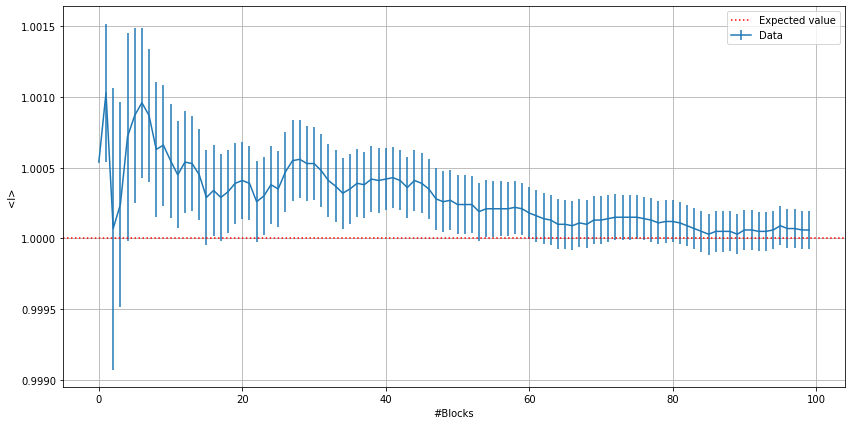

In [5]:
prog_average = np.loadtxt("../results/EX02_1(2).dat", usecols=0)
prog_error = np.loadtxt("../results/EX02_1(2).dat", usecols=1)

plt.figure(figsize=(14,7))
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average , yerr=prog_error, label = "Data")
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.show()

Come ci si aspetta i risultati ottenuti con l'importance sampling sono migliori.

### Esercizio 2.2

In questo esercizio era richiesto di produrre due grafici della distanza media dall'origine di due Random Walk, uno su di una griglia cubica ed uno nello spazio 3D continuo, ottenuti ripetendo la simulazione $10^4$ volte. 
Di seguito riporto il grafico di $\sqrt{\langle|\overline{r}_N|^2\rangle_{RW}}$ per entrambi i RW, con relativa incertezza statistica, in funzione dell'i-esimo step $i\in[0,10^2]$.

Mostro inoltre il fit con $f(N)=k\sqrt{N}$ per vedere se il cammino assume un comportamento diffusivo al crescere di N.

*Nota: Entrambi i cammini hanno step unitario*


In [8]:
from scipy import optimize

def test_func(x, k):
    return k * np.sqrt(x)

**(1) Random Walk su reticolo cubico**

k of the fit =  0.9289544536449553


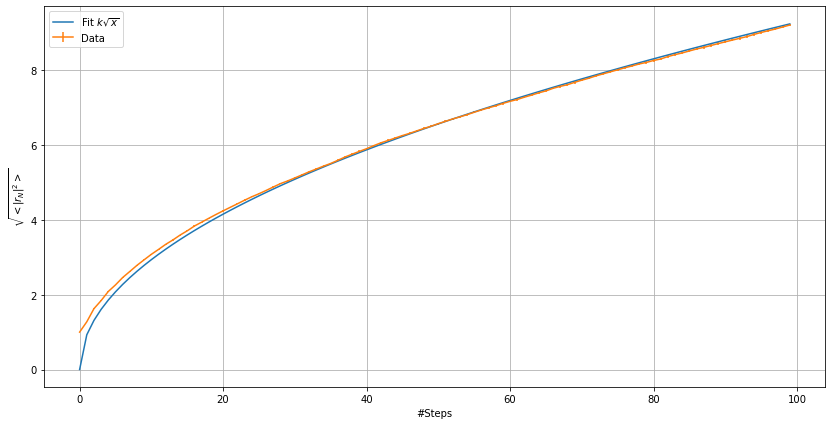

In [9]:
prog_distance = np.loadtxt("../results/EX02_2(1).dat", usecols=0)
distance_error = np.loadtxt("../results/EX02_2(1).dat", usecols=1)
N = prog_distance.size # Number of steps
steps_number = np.arange(0,N)

params, params_covariance = optimize.curve_fit(test_func, steps_number, prog_distance)
print("k of the fit = ", params[0])

plt.figure(figsize=(14,7))

plt.plot(steps_number, test_func(steps_number, params), label="Fit $k\sqrt{x}$")
plt.errorbar(steps_number, prog_distance, yerr=distance_error, label="Data")
plt.legend(loc="upper left")

plt.xlabel('#Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.show()

**(2) Random Walk nel continuo**

k of the fit =  0.9256313424846097


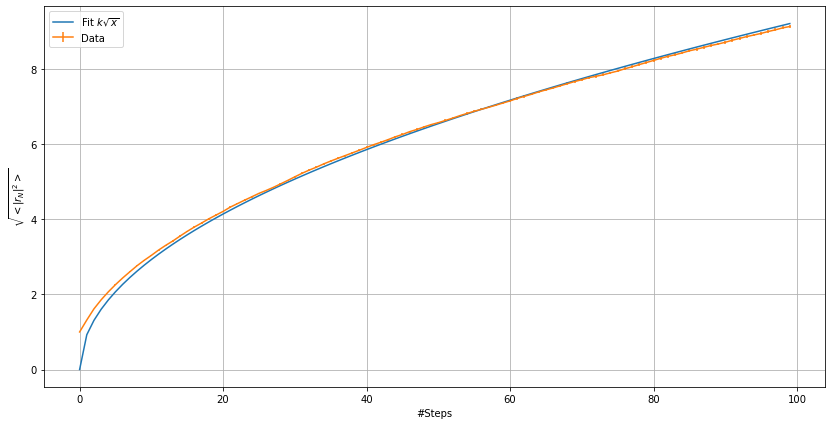

In [11]:
prog_distance = np.loadtxt("../results/EX02_2(2).dat", usecols=0)
distance_error = np.loadtxt("../results/EX02_2(2).dat", usecols=1)
N = prog_distance.size # Number of steps
steps_number = np.arange(0,N)

params, params_covariance = optimize.curve_fit(test_func, steps_number, prog_distance)
print("k of the fit = ", params[0])

plt.figure(figsize=(14,7))
plt.plot(steps_number, test_func(steps_number, params), label="Fit $k\sqrt{x}$")
plt.errorbar(steps_number, prog_distance, yerr=distance_error, label="Data")
plt.legend(loc="upper left")

plt.xlabel('#Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.show()

Dai grafici vediamo che entrambi i Random Walk hanno un comportamento diffusivo, poichè $\sqrt{\langle|\overline{r}_N|^2\rangle_{RW}}$ può essere fittato bene con una funzione del tipo $f(N)=k\sqrt{N}$, con $k=0.93$ per quello nel reticolo discreto e $k=0.92$ per quello nel continuo.